## Homework 3 - Lai, Li, Wu
#### Timothy Lai, Yuxin (Winnie) Li, Qianru (Vicky) Wu

#### [Q1] Read in data
- Read in files `gold.txt` and `labels.txt`
- Read in the files via Pandas and generate column names for each data frame
- Printed the first 10 rows in each data frame to verify data was properly separated

In [1]:
from pandas import Series, DataFrame
import pandas as pd

gold = pd.read_csv('gold.txt', sep = "\t", header=None, dtype=unicode).dropna()
gold.columns = ["url", "category"]
print gold[:10]
print "\n"

labels = pd.read_csv('labels.txt', sep = "\t", header=None, dtype=unicode).dropna()
labels.columns = ["turk", "url", "category"]
print labels[:10]

                                              url category
0                       http://0800-horoscope.com        G
1                              http://18games.net        X
2                            http://1pixelout.net        G
3          http://1porno.com/004/teens/index.html        X
4           http://1stpussy.com/005/16/index.html        X
5                               http://3x-pix.com        X
6                                   http://4d.com        G
7                             http://4neurons.com        G
8  http://4-panama-city-beach-condo.com/index.htm        G
9                             http://4whw.8m.net/        X


             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G
5  A2OVKTB7VNY8EW  http://000.cc        G
6  A31Z3E5SLATLML  http://000.cc        P
7   AAVCPZ8WT

#### [Q2] Split into two DataFrames
- Split the labels DataFrame into two: `labels_on_gold` and `labels_unknown`
- `labels_on_gold` contains all rows where the url is present in the gold set (mask created)
- `labels_unknown` contains all remaining rows of labels (where isin returns False)

In [2]:
# First generating the labels_on_gold dataframe
gold_url = gold['url']
gold_url_names = gold_url.values
labels_on_gold = labels[labels['url'].isin(gold_url_names)].drop_duplicates()
print labels_on_gold[:10]
print "\n"

# Next generating the labels_unknown dataframe
labels_unknown = labels[labels['url'].isin(gold_url_names) == False].drop_duplicates()
print labels_unknown[:10]

               turk                        url category
245  A1253FXHCZ9CWM  http://0800-horoscope.com        G
246  A153PKAL7OAY36  http://0800-horoscope.com        G
247  A1FV9SAPL5C6KY  http://0800-horoscope.com        G
248  A1JTOT0DWM6QGL  http://0800-horoscope.com        G
249  A1PXXEOGQ76RNJ  http://0800-horoscope.com        G
250  A21US576U8SCO4  http://0800-horoscope.com        G
251  A22C0PJUBFJTI0  http://0800-horoscope.com        G
252  A270HOAHEVIFW0  http://0800-horoscope.com        G
253  A2EG8FHODTEV63  http://0800-horoscope.com        R
254  A2LM400F4F0V0M  http://0800-horoscope.com        G


              turk             url category
0   A1OT3A29R9N1DG   http://000.cc        P
1   A1PXXEOGQ76RNJ   http://000.cc        G
3   A21US576U8SCO4   http://000.cc        G
4   A2LGX47NN7C5D3   http://000.cc        G
5   A2OVKTB7VNY8EW   http://000.cc        G
6   A31Z3E5SLATLML   http://000.cc        P
7    AAVCPZ8WTCFVK   http://000.cc        G
8    AHY98D5P05XIV   http://00

#### [Q3] Compute accuracies of turks
- Create a `rater_goodness` dataframe indexed by turk, includes two columns: the number of ratings and average correctness of ratings for each turk
    - Merged the labels data frame to cross check for turks who rated URLs correctly (made a mask then performed value_counts to see where the columns matched)
    - Computed average_correctness by dividing the sorted correct ratings by total number of ratings per turk
    - Arranged results in the new rater_goodness dataframe (only first ten rows printed)

In [3]:
num_of_ratings = labels_on_gold['turk'].value_counts()

# Checking for total number of correct ratings
labels_merge = labels_on_gold.merge(gold, left_on='url', right_on='url')
correct_mask = labels_merge["category_x"] == labels_merge["category_y"]
correct_ratings = labels_merge[correct_mask]["turk"].value_counts()
correct_sorted = correct_ratings.sort_values(ascending = True)

turks_sorted = num_of_ratings.sort_values(ascending = True)
average_correctness = correct_sorted/turks_sorted

rater_goodness = pd.DataFrame({'Number of Ratings': turks_sorted, 'Average Correctness of Ratings': average_correctness})
rater_goodness[:10]

,Average Correctness of Ratings,Number of Ratings
A112DVP1KG4QZU,1.000000,1
A1253FXHCZ9CWM,0.517241,29
A12CY1Q7XKJJDE,1.000000,1
A12RE8G66WTO8B,0.750000,20
A12Y1GTGIQDGRA,0.333333,3
A13CEW9JGDWGX1,1.000000,1
A13OE9GBRJ0S2U,0.750000,4
A14IQ4GLNWNPOJ,1.000000,1
A153PKAL7OAY36,0.722973,148
A1554ZM0CLKSG5,1.000000,1


#### [Q4] Odds Ratios
- Identify the odds of success as: odds = p/(1.001-p)
    - Added a column to the `rater_goodness` dataframe with these values
    - Printed the first ten rows of the new `rater_goodness` data frame with the "odds" column

In [4]:
odds_ratio = rater_goodness['Average Correctness of Ratings']/(1.001-rater_goodness['Average Correctness of Ratings'])
rater_goodness['odds'] = odds_ratio
rater_goodness[:10]

,Average Correctness of Ratings,Number of Ratings,odds
A112DVP1KG4QZU,1.000000,1,1000.000000
A1253FXHCZ9CWM,0.517241,29,1.069214
A12CY1Q7XKJJDE,1.000000,1,1000.000000
A12RE8G66WTO8B,0.750000,20,2.988048
A12Y1GTGIQDGRA,0.333333,3,0.499251
A13CEW9JGDWGX1,1.000000,1,1000.000000
A13OE9GBRJ0S2U,0.750000,4,2.988048
A14IQ4GLNWNPOJ,1.000000,1,1000.000000
A153PKAL7OAY36,0.722973,148,2.600369
A1554ZM0CLKSG5,1.000000,1,1000.000000


#### [Q5] Most accurate turks
- Masked for turks who have rated at least 20 gold set URLs
- Sorted values in descending order so that the most correct turks would appear first
- Printed the top 10 most accurate turks

In [5]:
atleast20_turks = rater_goodness[rater_goodness["Number of Ratings"] >= 20]
atleast20_turks_sorted = atleast20_turks.sort_values(["Average Correctness of Ratings"], ascending = False)
atleast20_turks_sorted[:10]

,Average Correctness of Ratings,Number of Ratings,odds
A2U0R4X38GUKZE,0.950000,20,18.627451
A22C0PJUBFJTI0,0.916667,36,10.869565
A23YQUBXZPKILZ,0.875000,24,6.944444
ATVALOQVDCMZW,0.854369,103,5.826657
A1HIXWH4OXT8S4,0.825000,40,4.687500
A3220HG1O83HQ4,0.818182,22,4.475385
A32W20KGQXS0LL,0.800000,25,3.980100
A20PWAB7G3HDHU,0.800000,20,3.980100
AJSJVK40F5HM6,0.785714,28,3.649635
A31OCN4MNHUQ6W,0.777174,184,3.472222


#### [Q6] Rating counts versus accuracy
- We want to verify if committed and accurate turks will rate lots of URL's, or if spammers are the only ones who rate lots of URLs.
- From the describe() function, we see that the users in the top 75% quantile have average correctness ratings of 1 and rate at least 11 URLs. They also have an odds ratio of 1000.

In [6]:
rater_goodness.describe()

,Average Correctness of Ratings,Number of Ratings,odds
count,227.000000,269.000000,227.000000
mean,0.772489,12.338290,371.707059
std,0.217874,23.671273,482.610394
min,0.102041,1.000000,0.113510
25%,0.630682,1.000000,1.703717
50%,0.769231,3.000000,3.318951
75%,1.000000,11.000000,1000.000000
max,1.000000,184.000000,1000.000000


From visual inspection of the scatterplot below, we see that the majority of turks who rate < 11 URLs have a wide range of average correctness of ratings. For the top 75% quantile in "Number of Ratings" for which we are interested (denoted points in red), we see that the average correctness of ratings does not approach 1.0 (which was indicated above via the describe() function as the cutoff for the quantile). Additionally, the same scatter pattern is seen as for the remaining data points. 

Populating the interactive namespace from numpy and matplotlib


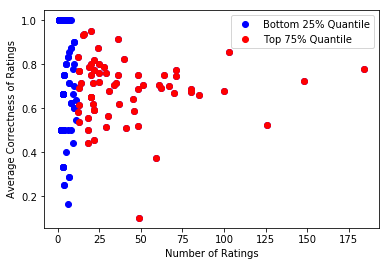

In [7]:
%pylab inline
top75_quantile = rater_goodness['Number of Ratings'].quantile(0.75)
rater_goodness_top75 = rater_goodness[rater_goodness['Number of Ratings'] > top75_quantile]

plot(rater_goodness["Number of Ratings"], rater_goodness["Average Correctness of Ratings"], marker = "o", color = "blue", linestyle = "None", label = "Bottom 25% Quantile")
plot(rater_goodness_top75["Number of Ratings"], rater_goodness_top75["Average Correctness of Ratings"], marker = "o", color = "red", linestyle = "None", label = "Top 75% Quantile")
xlabel("Number of Ratings")
ylabel("Average Correctness of Ratings")
legend(numpoints = 1, loc='best')
show()




Also checking for the standard (Pearson) correlation, we see the magnitude is < 0.3. "In English", this would suggest a low correlation between Number of Ratings and Average Correctness.


In [8]:
pearson_corr = rater_goodness['Average Correctness of Ratings'].corr(rater_goodness['Number of Ratings'], method = "pearson")
print "The Pearson correlation is:", pearson_corr


The Pearson correlation is: -0.215035254406


Finally, when  we run a simple least squares regression, we see that there is not a strong statistical correlation between the number of ratings and average ratings. With all the of the above presented, we can say that the number of ratings by a turker is NOT strongly related to his or her accuracy. 

In [9]:
import statsmodels.api as sm
from patsy import dmatrices

rater_goodness_copy = rater_goodness.copy()
rater_goodness_copy.columns = ['AvgCorrectness', 'NumRatings', 'Odds']
y, X = dmatrices('AvgCorrectness ~ NumRatings', data = rater_goodness_copy, return_type = 'dataframe')
model = sm.OLS(y,X)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:         AvgCorrectness   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     10.91
Date:                Tue, 08 Aug 2017   Prob (F-statistic):            0.00111
Time:                        22:38:37   Log-Likelihood:                 29.686
No. Observations:                 227   AIC:                            -55.37
Df Residuals:                     225   BIC:                            -48.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7993      0.016     48.998      0.0

C:\Users\Tim\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### [Q7] Overall predicted odds
- Considering each url that is not in the gold set (from labels_unknown), and each category c.
- Calculate the product of odds of all turks who (a) rated url u as category c and (B) have rated more gold set urls than 75% of all turks

In [10]:
top75_quantile = rater_goodness['Number of Ratings'].quantile(0.75)
labels_odds_merge = labels_unknown.merge(rater_goodness, left_on = "turk", right_index = True)
top75percent_turks = labels_odds_merge[labels_odds_merge["Number of Ratings"] > top75_quantile]
overall_odds = top75percent_turks.groupby(['url','category'])[['odds']].agg('prod')
overall_odds[:10]

odds
url                                                category           
http://0-101.net                                   G          2.297602
http://000.cc                                      G          1.485456
http://0000.jp                                     G         14.339248
http://000relationships.com                        G          3.841962
                                                   P          1.851852
http://000vitamins.com                             G          4.033641
http://000webhost.com                              G         11.892639
http://003my.com                                   G          4.861524
http://007absolutehardcore.com/early_cumshots/i... P          3.346522
                                                   R         12.290450

#### [Q8] Predicted categories
- Create a DataFrame called `result_75` with the following components:
  - Category `top category` includes highest overall odds for that url
  - Category `top odds` includes overall odds for `top category`
  
- `top category` was created by unstacking the data frame, then transposing in order to have the data frame indexed by url - then the top categories were fetched using idxmax()
- Similarly, `top odds` was created by unstacking and transposing, then odds values were fetched using max()
- `result_75` was created as a data frame with these two columns, the first 10 rows are printed below

In [11]:
top_category = overall_odds.unstack()['odds'].T.idxmax()
top_odds = overall_odds.unstack()['odds'].T.max()

result_75 = pd.DataFrame({'top category': top_category, 'top odds': top_odds})
result_75[:10]

,top category,top odds
url,,
http://0-101.net,G,2.297602
http://000.cc,G,1.485456
http://0000.jp,G,14.339248
http://000relationships.com,G,3.841962
http://000vitamins.com,G,4.033641
http://000webhost.com,G,11.892639
http://003my.com,G,4.861524
http://007absolutehardcore.com/early_cumshots/index.html,X,293.252871
http://007swz.cn,G,1.485456


#### [Q9] Predicted categories using more turks
- Repeat the code from [Q7] and [Q8] but replacing the 75% quantile with 25%.
- Create a DataFrame called `result_25` with the same components:
  - Category `top category` includes highest overall odds for that url
  - Category `top odds` includes overall odds for `top category`
  
- A copy of the `result_75` data frame was created to re-name the columns for clarity
- `result_75` and `result_25` were merged in order to match the data to the same indices
- A crosstab was created with the index and columns as the categories so we can identify ratings as given by turks for both the top 25% and 75% quantiles.

In [12]:
# Repeating the code from [Q7]
top25_quantile = rater_goodness['Number of Ratings'].quantile(0.25)
top25percent_turks = labels_odds_merge[labels_odds_merge["Number of Ratings"] > top25_quantile]
overall_odds_25 = top25percent_turks.groupby(['url','category'])[['odds']].agg('prod')

# Repeating the code from [Q8]
top_category_25 = overall_odds_25.unstack()["odds"].T.idxmax()
top_odds_25 = overall_odds_25.unstack()["odds"].T.max()

result_25 = pd.DataFrame({'top category 25': top_category_25, 'top odds 25': top_odds_25})

result_75_copy = result_75.copy()
result_75_copy.columns = ['top category 75', 'top odds 75']
result_merge = result_75_copy.merge(result_25, left_index = True, right_index = True)
result_merge
result_crosstab = pd.crosstab(result_merge['top category 75'], result_merge['top category 25'],margins=True)
result_crosstab

top category 25,G,P,R,X,All
top category 75,,,,,
G,8294,563,171,232,9260
P,193,356,50,26,625
R,21,34,128,25,208
X,19,5,26,467,517
All,8527,958,375,750,10610


From the above cross tab, we see that the most errors occur between the (G,P) and (G,X) pairs, where the "Top 75 Quantile" has rated a URL "G" and the "Top 25 Quantile" has rated the same URL either "P" or "X".